# Standardization


1. The transformed data will have a mean of 0 and a standard deviation of 1.
2. Standardization does not restrict values to a specific range.
3. It maintains the distribution shape but shifts and scales it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
print(df.isnull().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [5]:
df.fillna(df.median(),inplace=True)

MEDV represents the median house price in $1000s.

Standardizing it would convert it to a scale where mean = 0 and standard deviation = 1, making it hard to interpret in real-world terms.


MEDV is the output (dependent variable), while standardization is applied to input features (independent variables) to improve model training.

In [16]:
print("Mean before standardization:", df.mean())
print("Std before standardization:", df.std())

Mean before standardization: CRIM         3.479140
ZN          10.768775
INDUS       11.028893
CHAS         0.067194
NOX          0.554695
RM           6.284634
AGE         68.845850
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.664625
MEDV        22.532806
dtype: float64
Std before standardization: CRIM         8.570832
ZN          23.025124
INDUS        6.704679
CHAS         0.250605
NOX          0.115878
RM           0.702617
AGE         27.486962
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.017219
MEDV         9.197104
dtype: float64


In [6]:
features_to_standardize = ["CRIM", "ZN", "INDUS", "NOX", "RM", "AGE", "DIS", "TAX", "PTRATIO", "B", "LSTAT"]

In [7]:
scaler = StandardScaler()#This will scale features to have mean=0 and std=1
df_standardized = df.copy()#Copies the original dataset to avoid modifying it directly
#fit() → Computes the mean and standard deviation of each feature.
#transform() → Applies the formula: (X-mean)/std
df_standardized[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])
print(df_standardized.head())

       CRIM        ZN     INDUS  CHAS       NOX  ...       TAX   PTRATIO         B     LSTAT  MEDV
0 -0.405592  0.314369 -1.301706   0.0 -0.144217  ... -0.666608 -1.459000  0.441052 -1.096193  24.0
1 -0.403140 -0.468160 -0.591052   0.0 -0.740262  ... -0.987329 -0.303094  0.441052 -0.502779  21.6
2 -0.403142 -0.468160 -0.591052   0.0 -0.740262  ... -0.987329 -0.303094  0.396427 -1.231709  34.7
3 -0.402549 -0.468160 -1.321115   0.0 -0.835284  ... -1.106115  0.113032  0.416163 -1.387195  33.4
4 -0.398265 -0.468160 -1.321115   0.0 -0.835284  ... -1.106115  0.113032  0.441052 -0.176116  36.2

[5 rows x 14 columns]


In [8]:
print("Mean after Standardization:",df_standardized[features_to_standardize].mean())
print("Standard Deviation after Standardization:",df_standardized[features_to_standardize].std())

Mean after Standardization: CRIM      -2.808469e-17
ZN        -4.037175e-17
INDUS      1.685082e-16
NOX       -1.965929e-16
RM        -1.088282e-16
AGE       -1.334023e-16
DIS       -8.425408e-17
TAX        0.000000e+00
PTRATIO   -4.212704e-16
B         -7.442444e-16
LSTAT     -8.425408e-17
dtype: float64
Standard Deviation after Standardization: CRIM       1.00099
ZN         1.00099
INDUS      1.00099
NOX        1.00099
RM         1.00099
AGE        1.00099
DIS        1.00099
TAX        1.00099
PTRATIO    1.00099
B          1.00099
LSTAT      1.00099
dtype: float64


# Split Data for Model Training

In [9]:
X = df_standardized.drop(columns=["MEDV"]) #Input except MEDV
y = df["MEDV"] #Output

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (404, 13)
Testing set size: (102, 13)


# Training a Machine Learning Model

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.6591013893903521
Mean Absolute Error: 3.148737317023755
Root Mean Squared Error: 4.999938478631841


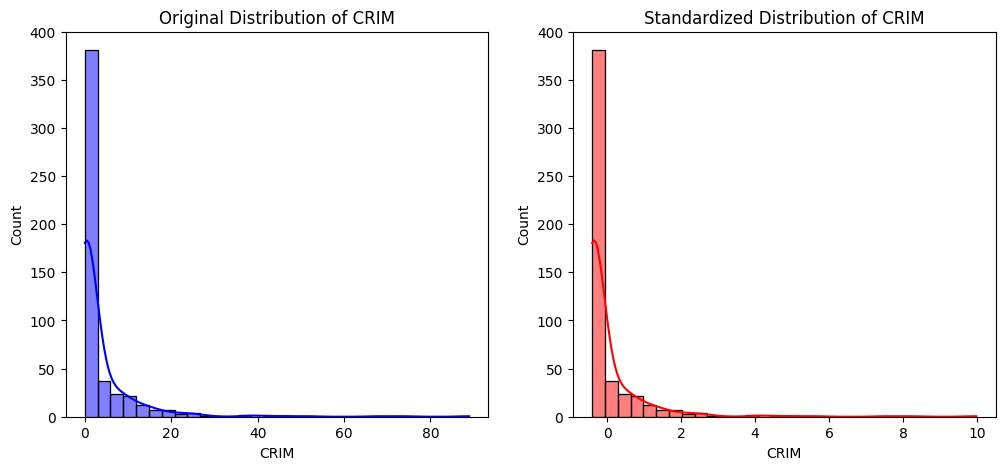

In [13]:
feature = "CRIM"
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df[feature], bins=30, color="blue", kde=True)
plt.title(f"Original Distribution of {feature}")
plt.subplot(1, 2, 2)
sns.histplot(df_standardized[feature], bins=30, color="red", kde=True)
plt.title(f"Standardized Distribution of {feature}")
plt.show()

# Normalization

1.The transformed data is scaled between 0 and 1 (or any custom range).

2.Sensitive to outliers because extreme values affect scaling.

3.Preserves the relationships between original values.

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
features_to_normalize = ["CRIM", "ZN", "INDUS", "NOX", "RM", "AGE", "DIS", "TAX", "PTRATIO", "B", "LSTAT"]

In [20]:
print("Min values before Normalization:", df.min())
print("Max values before Normalization:", df.max())

Min values before Normalization: CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
MEDV         5.00000
dtype: float64
Max values before Normalization: CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
MEDV        50.0000
dtype: float64


In [19]:
normalScaler = MinMaxScaler()
df_normalized = df.copy()
#fit() → Computes the min and max values for each feature.
#transform() → Uses the Min-Max formula to scale each value. X-Xmin/Xmax-Xmin
df_normalized[features_to_normalize] = normalScaler.fit_transform(df[features_to_normalize])
print(df_normalized.head())

       CRIM    ZN     INDUS  CHAS       NOX  ...       TAX   PTRATIO         B     LSTAT  MEDV
0  0.000000  0.18  0.067815   0.0  0.314815  ...  0.208015  0.287234  1.000000  0.089680  24.0
1  0.000236  0.00  0.242302   0.0  0.172840  ...  0.104962  0.553191  1.000000  0.204470  21.6
2  0.000236  0.00  0.242302   0.0  0.172840  ...  0.104962  0.553191  0.989737  0.063466  34.7
3  0.000293  0.00  0.063050   0.0  0.150206  ...  0.066794  0.648936  0.994276  0.033389  33.4
4  0.000705  0.00  0.063050   0.0  0.150206  ...  0.066794  0.648936  1.000000  0.267660  36.2

[5 rows x 14 columns]


In [21]:
print("Min values after Normalization:", df_normalized[features_to_normalize].min())
print("Max values after Normalization:", df_normalized[features_to_normalize].max())

Min values after Normalization: CRIM       0.0
ZN         0.0
INDUS      0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
dtype: float64
Max values after Normalization: CRIM       1.0
ZN         1.0
INDUS      1.0
NOX        1.0
RM         1.0
AGE        1.0
DIS        1.0
TAX        1.0
PTRATIO    1.0
B          1.0
LSTAT      1.0
dtype: float64


In [22]:
X = df_normalized.drop(columns=["MEDV"])  # Features (Input)
y = df["MEDV"]  # Target (Output)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (404, 13)
Testing set size: (102, 13)


In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


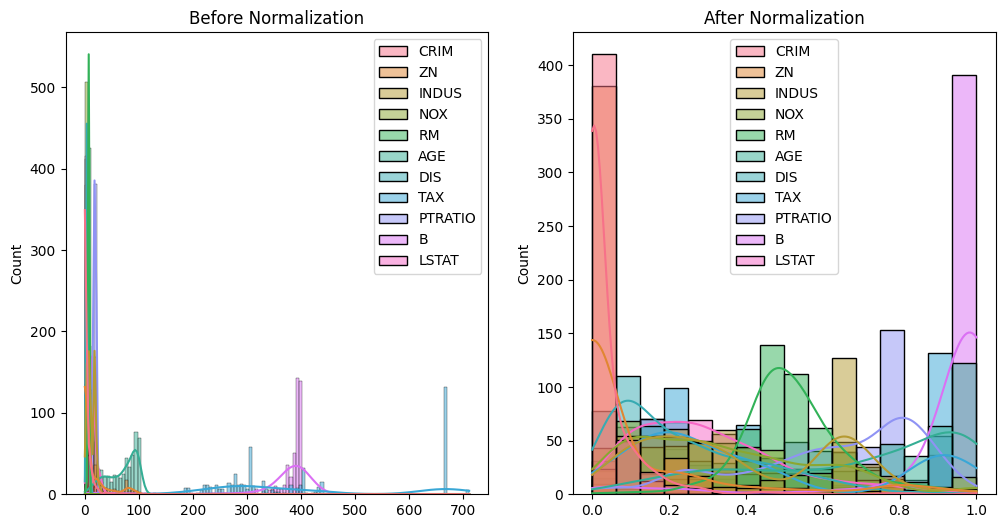

In [24]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df[features_to_normalize], kde=True)
plt.title("Before Normalization")
plt.subplot(1,2,2)
sns.histplot(df_normalized[features_to_normalize], kde=True)
plt.title("After Normalization")
plt.show()
